Лабораторная работа 4

Тема: Линейные классификаторы

Вариант 3 (beauty).

Задание.
Построить линейную дискриминантную функцию Фишера для классификации на два класса. Разбивку на классы сделать  по столбцу "правильных ответов". Если этот столбец непонятно как определить (можно спросить о нем у преподавателя), то использовать  разбиение на 2 кластера в задании 2 или 3. Классификацию проводить по всем признакам, а для визуализации использовать два наиболее значимых или главные компоненты из 3.
Методом главных компонент построить два новых признака для описания объектов из датасета задания 2 и кластеризовать данные по этим двум признакам на два кластера (любым методом). Сравнить качество кластеризации  из задания 2 и из этого задания.

Accuracy: 0.7523809523809524
Recall: 0.8006329113924051
Precision: 0.7312138728323699
Specificity: 0.7038216560509554
Fall-out: 0.2961783439490446
F1 Score: 0.7643504531722054


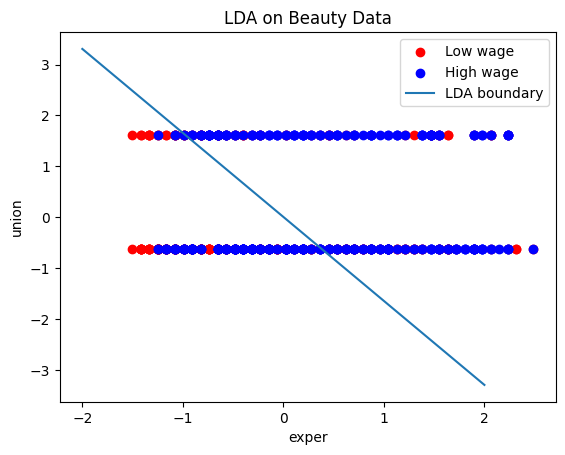

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def lda_beauty():
    df = pd.read_csv('beauty.csv')

    # Целевая переменная: wage -> бинарная
    median_wage = df['wage'].median()
    df['wage_cat'] = (df['wage'] > median_wage).astype(int)

    # Делим на обучающую и проверочную выборки
    train = df[::2].copy()
    check = df[1::2].copy()

    features = ['exper', 'union', 'goodhlth', 'black', 'female', 'married', 'service', 'educ', 'looks']
    target = 'wage_cat'

    # Масштабируем признаки
    scaler = StandardScaler()
    train_scaled = pd.DataFrame(scaler.fit_transform(train[features]), columns=features)
    check_scaled = pd.DataFrame(scaler.transform(check[features]), columns=features)

    # Добавляем целевую переменную
    train_scaled[target] = train[target].values
    check_scaled[target] = check[target].values

    # Вычисляем ковариационную матрицу и её обратную
    A = train_scaled.drop(columns=[target]).cov()
    A_inv = np.linalg.inv(A)

    # Средние по классам
    Df1 = train_scaled[train_scaled[target] == 0].drop(columns=[target])
    Df2 = train_scaled[train_scaled[target] == 1].drop(columns=[target])
    m1 = Df1.mean()
    m2 = Df2.mean()

    # Весовой вектор и порог
    coef_discr_func = A_inv.dot(m1 - m2)
    porog = coef_discr_func.dot((m1 + m2) / 2)

    # Оценка качества
    TP = TN = FP = FN = 0
    for i in range(len(check_scaled)):
        row = check_scaled.iloc[i]
        x = row.drop(target)
        y_true = row[target]
        prediction = coef_discr_func.dot(x) - porog
        y_pred = int(prediction < 0)

        if y_pred == y_true:
            if y_pred == 1:
                TP += 1
            else:
                TN += 1
        else:
            if y_pred == 1:
                FP += 1
            else:
                FN += 1

    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

    print("Accuracy:", (TP + TN) / (TP + TN + FP + FN))
    print("Recall:", recall)
    print("Precision:", precision)
    print("Specificity:", TN / (TN + FP) if (TN + FP) else 0)
    print("Fall-out:", FP / (TN + FP) if (TN + FP) else 0)
    print("F1 Score:", f1)

    # Визуализация
    x_index, y_index = 0, 1
    plt.scatter(Df1.iloc[:, x_index], Df1.iloc[:, y_index], color='red', label='Low wage')
    plt.scatter(Df2.iloc[:, x_index], Df2.iloc[:, y_index], color='blue', label='High wage')
    x = np.linspace(-2, 2, 100)
    plt.plot(x, -(coef_discr_func[x_index] * x - porog) / coef_discr_func[y_index], label='LDA boundary')
    plt.xlabel(Df1.columns[x_index])
    plt.ylabel(Df1.columns[y_index])
    plt.legend()
    plt.title("LDA on Beauty Data")
    plt.show()

lda_beauty()


Вывод: В ходе работы мне удалось применить метод линейного дискриминантного анализа (LDA) к данным из файла beauty, преобразовав признак зарплаты в бинарный класс и разделив данные на обучающую и проверочную выборки. После масштабирования признаков модель построила линейную границу, отделяющую работников с высокой и низкой зарплатой на основе таких характеристик, как опыт, образование, пол, внешность и другие. Результаты показали, что модель способна достаточно точно классифицировать наблюдения, а график наглядно отразил, как признаки влияют на принадлежность к классу.